In [1]:
import pandas as pd
data = pd.read_csv('games.csv')

In [2]:
data.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [3]:
# Remove the unnecessary features such as id, created_at, last_move_at, white_id, black_id, moves, opening_ply. These won't be helpful for our training.

filtered_data = data.drop(columns=['id', 'created_at', 'last_move_at', 'white_id', 'black_id', 'moves', 'opening_ply', 'opening_name'])
filtered_data.head()

,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco
0,False,13,outoftime,white,15+2,1500,1191,D10
1,True,16,resign,black,5+10,1322,1261,B00
2,True,61,mate,white,5+10,1496,1500,C20
3,True,61,mate,white,20+0,1439,1454,D02
4,True,95,mate,white,30+3,1523,1469,C41


In [4]:
# Split increment_code into base time and increment
filtered_data[['base_time', 'increment']] = filtered_data['increment_code'].str.split('+', expand=True)

# Convert to integers
filtered_data['base_time'] = filtered_data['base_time'].astype(int)
filtered_data['increment'] = filtered_data['increment'].astype(int)

filtered_data = filtered_data.drop(columns=['increment_code'])
filtered_data.head()

,rated,turns,victory_status,winner,white_rating,black_rating,opening_eco,base_time,increment
0,False,13,outoftime,white,1500,1191,D10,15,2
1,True,16,resign,black,1322,1261,B00,5,10
2,True,61,mate,white,1496,1500,C20,5,10
3,True,61,mate,white,1439,1454,D02,20,0
4,True,95,mate,white,1523,1469,C41,30,3


In [5]:
# Eliminate the games that could have ended abruptly due to one player being unable to play.
# Check the games that ended without a mate before 10 moves.

early_non_mate_games_under_10 = filtered_data[(data['turns'] <= 10) & (data['victory_status'] != 'mate')]
print(f"Number of early non mate games under 10 moves: {len(early_non_mate_games_under_10)}")
early_non_mate_games_under_10.head()

Number of early non mate games under 10 moves: 602


,rated,turns,victory_status,winner,white_rating,black_rating,opening_eco,base_time,increment
5,False,5,draw,draw,1250,1002,B27,10,0
7,False,9,resign,black,1413,2108,B00,15,30
21,False,3,resign,white,1094,1068,A40,30,60
46,False,3,resign,black,978,1500,B01,15,0
47,False,7,resign,white,1343,978,B20,10,0


In [6]:
# 20 moves is a good threshold because we are out of the opening phase and into the middle-game where tactics and strategic plans are to be used.

filtered_data = filtered_data[(data['victory_status'] == 'mate') | (data['turns'] > 20)]
print(f"Number of games after filtering: {len(filtered_data)}")
filtered_data.head()

Number of games after filtering: 18576


,rated,turns,victory_status,winner,white_rating,black_rating,opening_eco,base_time,increment
2,True,61,mate,white,1496,1500,C20,5,10
3,True,61,mate,white,1439,1454,D02,20,0
4,True,95,mate,white,1523,1469,C41,30,3
6,True,33,resign,white,1520,1423,D00,10,0
8,True,66,resign,black,1439,1392,C50,15,0


In [7]:
# Remove the duplicates

filtered_data = filtered_data.drop_duplicates()
print(f"Number of games after removing duplicates: {len(filtered_data)}")

Number of games after removing duplicates: 17712


In [8]:
# EDA

filtered_data.describe()

,turns,white_rating,black_rating,base_time,increment
count,17712.000000,17712.000000,17712.000000,17712.000000,17712.000000
mean,64.392841,1606.007565,1599.840334,13.364668,4.791836
std,31.651284,286.499440,288.121730,15.079915,11.897221
min,4.000000,784.000000,789.000000,0.000000,0.000000
25%,41.000000,1413.000000,1405.000000,10.000000,0.000000
50%,58.000000,1577.000000,1572.000000,10.000000,0.000000
75%,81.000000,1800.000000,1796.000000,15.000000,7.000000
max,349.000000,2622.000000,2621.000000,180.000000,180.000000


In [9]:
# Create a new feature called rating_difference, because the difference between ratings could give us hints about the game result.

filtered_data = filtered_data.copy()
filtered_data['rating_difference'] = filtered_data['white_rating'] - filtered_data['black_rating']
filtered_data.head()

,rated,turns,victory_status,winner,white_rating,black_rating,opening_eco,base_time,increment,rating_difference
2,True,61,mate,white,1496,1500,C20,5,10,-4
3,True,61,mate,white,1439,1454,D02,20,0,-15
4,True,95,mate,white,1523,1469,C41,30,3,54
6,True,33,resign,white,1520,1423,D00,10,0,97
8,True,66,resign,black,1439,1392,C50,15,0,47


In [10]:
# divide the victory_status into draw, mate, outoftime and resign with the inputs 1 for True, 0 for False
# Change the 'winner' inputs into 1 if white wins, -1 if black wins, 0 if draw.

filtered_data['rated'] = filtered_data['rated'].astype(int)
filtered_data_encoded = pd.get_dummies(filtered_data, columns=['victory_status'])
winner_mapping = {'white': 1, 'black': -1, 'draw': 0}
filtered_data_encoded['winner_numeric'] = filtered_data_encoded['winner'].map(winner_mapping)
filtered_data_encoded = filtered_data_encoded.drop(columns=['winner'])
filtered_data_encoded = filtered_data_encoded.rename(columns={'winner_numeric': 'winner'})
filtered_data_encoded.head()

,rated,turns,white_rating,black_rating,opening_eco,base_time,increment,rating_difference,victory_status_draw,victory_status_mate,victory_status_outoftime,victory_status_resign,winner
2,1,61,1496,1500,C20,5,10,-4,0,1,0,0,1
3,1,61,1439,1454,D02,20,0,-15,0,1,0,0,1
4,1,95,1523,1469,C41,30,3,54,0,1,0,0,1
6,1,33,1520,1423,D00,10,0,97,0,0,0,1,1
8,1,66,1439,1392,C50,15,0,47,0,0,0,1,-1


In [11]:
#  Change the values of 'opening_eco' based on the changed inputs of 'winner' by using mean of all its values corresponding to a particular 'opening_eco'

opening_eco_target_mean = filtered_data_encoded.groupby('opening_eco')['winner'].transform('mean')
filtered_data_encoded['opening_eco_encoded'] = opening_eco_target_mean
filtered_data_encoded = filtered_data_encoded.drop(columns=['opening_eco'])
filtered_data_encoded = filtered_data_encoded.rename(columns={'opening_eco_encoded': 'opening_eco'})
filtered_data_encoded.head()

,rated,turns,white_rating,black_rating,base_time,increment,rating_difference,victory_status_draw,victory_status_mate,victory_status_outoftime,victory_status_resign,winner,opening_eco
2,1,61,1496,1500,5,10,-4,0,1,0,0,1,-0.062724
3,1,61,1439,1454,20,0,-15,0,1,0,0,1,0.056410
4,1,95,1523,1469,30,3,54,0,1,0,0,1,0.207178
6,1,33,1520,1423,10,0,97,0,0,0,1,1,-0.013846
8,1,66,1439,1392,15,0,47,0,0,0,1,-1,-0.038961


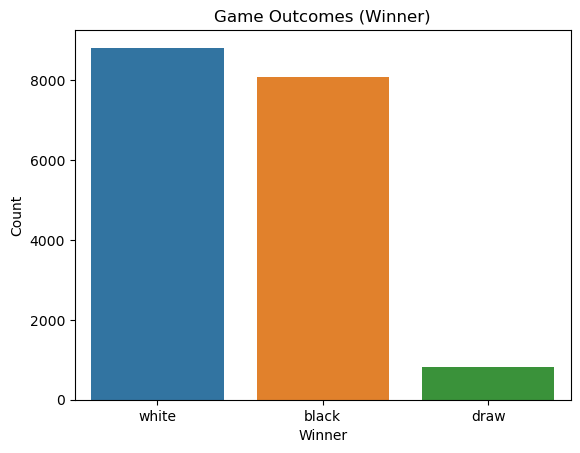

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Winner Counts

sns.countplot(x='winner', data=filtered_data)
plt.title('Game Outcomes (Winner)')
plt.xlabel('Winner')   # -1->Black, 0->Draw, 1->White
plt.ylabel('Count')
plt.show()

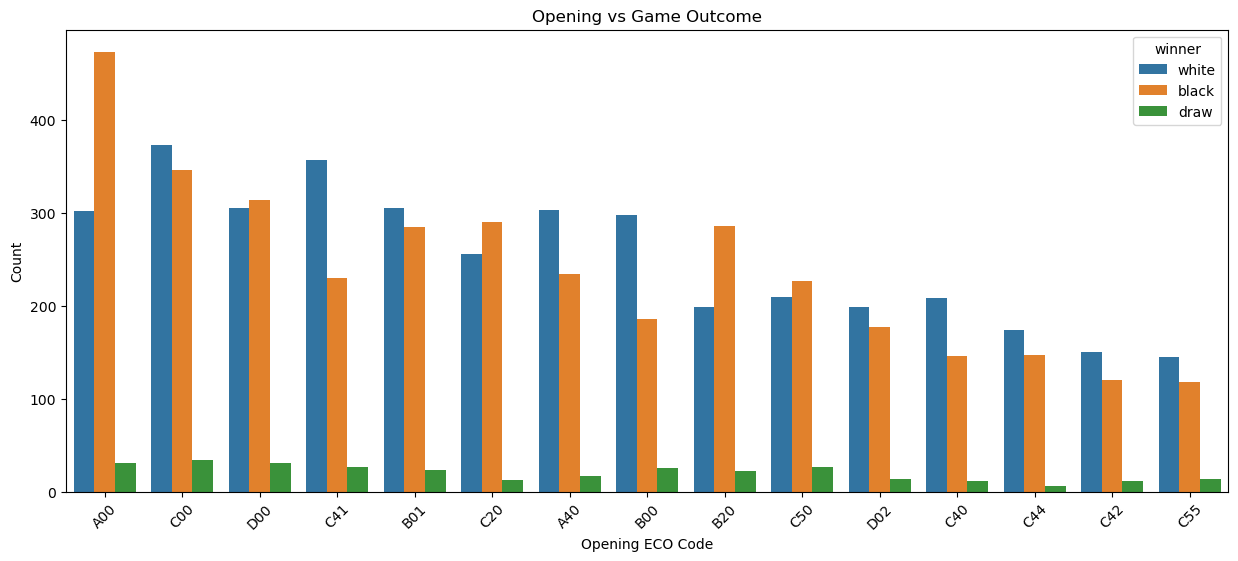

In [13]:
# Opening vs Game Outcome

plt.figure(figsize=(15, 6))
sns.countplot(x='opening_eco', hue='winner', data=filtered_data, order=filtered_data['opening_eco'].value_counts().index[:15])
plt.title('Opening vs Game Outcome')
plt.xlabel('Opening ECO Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

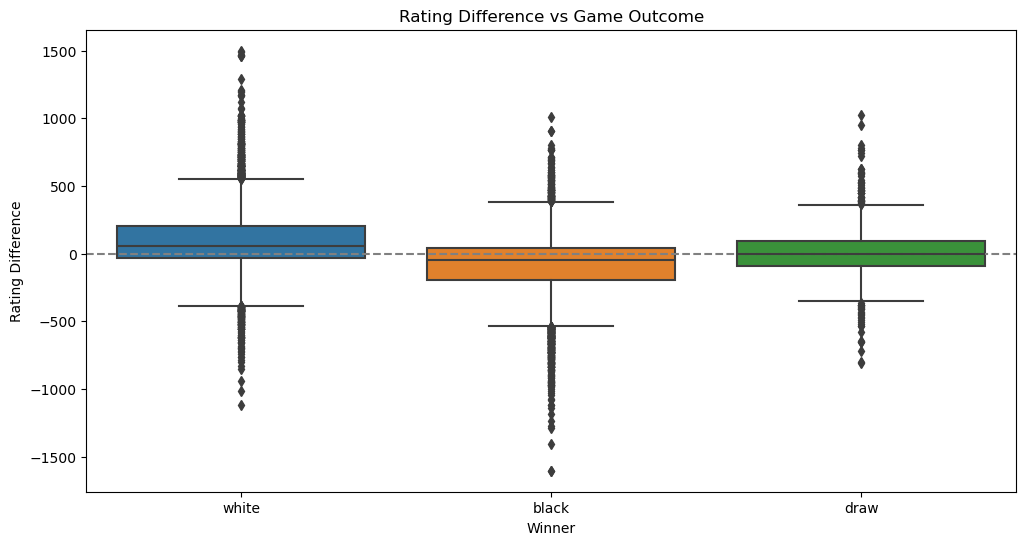

In [14]:
# Rating Difference vs Game Outcome

plt.figure(figsize=(12, 6))
sns.boxplot(x='winner', y='rating_difference', data=filtered_data)
plt.title('Rating Difference vs Game Outcome')
plt.xlabel('Winner')
plt.ylabel('Rating Difference')
plt.axhline(0, color='gray', linestyle='--')  # Line to indicate equal rating
plt.show()

In [15]:
# Splitting the Dataset

from sklearn.model_selection import train_test_split

filtered_data = filtered_data_encoded
X = filtered_data.drop(columns=['winner','victory_status_outoftime','victory_status_draw','victory_status_mate','victory_status_resign'])
y = filtered_data['winner']

In [16]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Train set size: 14169
Validation set size: 1771
Test set size: 1772


In [17]:
from collections import Counter
class_mapping = {-1: "Black Win", 0: "Draw", 1: "White Win"}
def map_labels(y):
    return [class_mapping[label] for label in y]
print("\nDistribution in Train set:")
print(Counter(map_labels(y_train)))

print("\nDistribution in Validation set:")
print(Counter(map_labels(y_val)))

print("\nDistribution in Test set:")
print(Counter(map_labels(y_test)))


Distribution in Train set:
Counter({'White Win': 7056, 'Black Win': 6475, 'Draw': 638})

Distribution in Validation set:
Counter({'White Win': 883, 'Black Win': 800, 'Draw': 88})

Distribution in Test set:
Counter({'White Win': 876, 'Black Win': 809, 'Draw': 87})


In [18]:
# Training the Models

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [19]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

# Since we have 3 classes, we will use Scikits logistic regression which supports for multiclass usages. 

logistic_regression = LogisticRegression(
    multi_class='multinomial',  # Support provided by scikit for multiclass classification
    solver='lbfgs',            # Solver suitable for multi-class problems
    max_iter=5000,             # Increase iterations to ensure convergence
    random_state=42
)

logistic_regression.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='multinomial', random_state=42)

In [20]:
y_val_pred = logistic_regression.predict(X_val)
print("Validation Report: ")
print(classification_report(y_val, y_val_pred))

Validation Report: 
              precision    recall  f1-score   support

          -1       0.63      0.60      0.62       800
           0       0.00      0.00      0.00        88
           1       0.64      0.73      0.68       883

    accuracy                           0.63      1771
   macro avg       0.42      0.44      0.43      1771
weighted avg       0.60      0.63      0.62      1771



In [21]:
y_test_pred = logistic_regression.predict(X_test)
logistic_regression_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {logistic_regression_accuracy:.2f}')

Test Accuracy: 0.61


In [22]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,
    random_state=42
)

decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [23]:
y_val_pred = decision_tree.predict(X_val)
print("Validation Report: ")
print(classification_report(y_val, y_val_pred))

Validation Report: 
              precision    recall  f1-score   support

          -1       0.61      0.61      0.61       800
           0       0.09      0.09      0.09        88
           1       0.65      0.65      0.65       883

    accuracy                           0.60      1771
   macro avg       0.45      0.45      0.45      1771
weighted avg       0.60      0.60      0.60      1771



In [24]:
y_test_pred = decision_tree.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {decision_tree_accuracy:.2f}')

Test Accuracy: 0.60


In [25]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
)

random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
y_val_pred = random_forest.predict(X_val)
print("Validation Report:")
print(classification_report(y_val, y_val_pred))

Validation Report:
              precision    recall  f1-score   support

          -1       0.64      0.64      0.64       800
           0       0.20      0.01      0.02        88
           1       0.65      0.71      0.68       883

    accuracy                           0.64      1771
   macro avg       0.49      0.45      0.44      1771
weighted avg       0.62      0.64      0.63      1771



In [27]:
y_test_pred = random_forest.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {random_forest_accuracy:.2f}')

Test Accuracy: 0.61


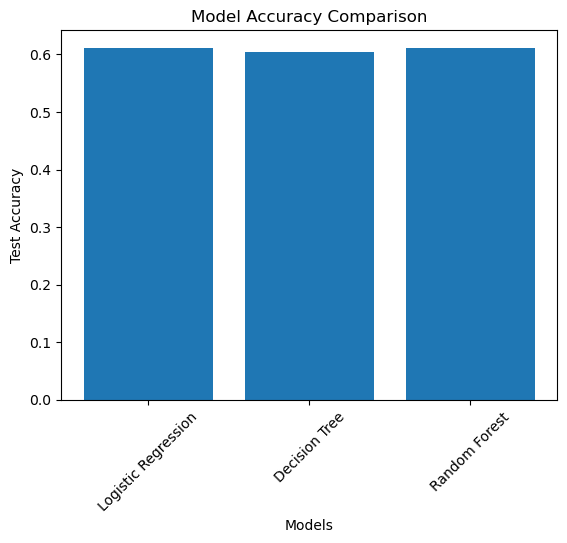

In [29]:
# Model Accuracy Comparison

models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [logistic_regression_accuracy, decision_tree_accuracy, random_forest_accuracy]

plt.figure()
plt.bar(models, accuracies)
plt.xlabel("Models")
plt.ylabel("Test Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.show()